In [1]:
# Let's import the required libraries
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Let's fetch some data!

In [3]:
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)
#print(faces.data.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)
(1140, 2914)


## Let's plot a few faces to see the data that we are dealing with

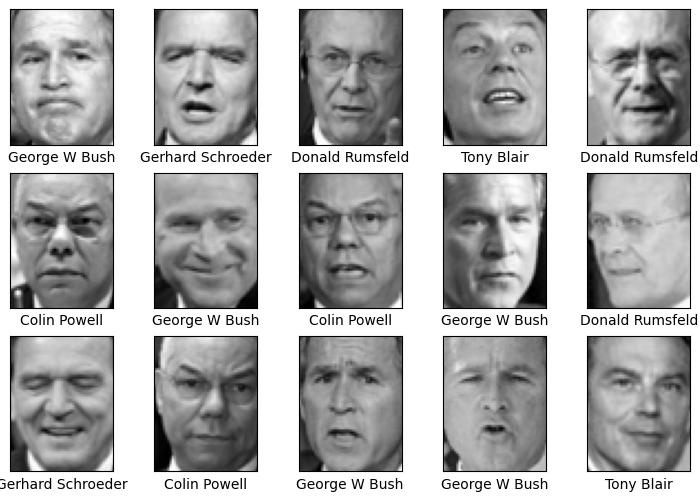

In [4]:
fig, ax = plt.subplots(3, 5)
fig = plt.gcf()
fig.set_size_inches(9, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# Step 2: Split the data into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# Step 3: Train the SVM model

In [6]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced')
model.fit(Xtrain, ytrain)


SVC(class_weight='balanced')

# Step 4: Testing and Evaluating the predictions of the model

In [11]:
yfit = model.predict(Xtest)

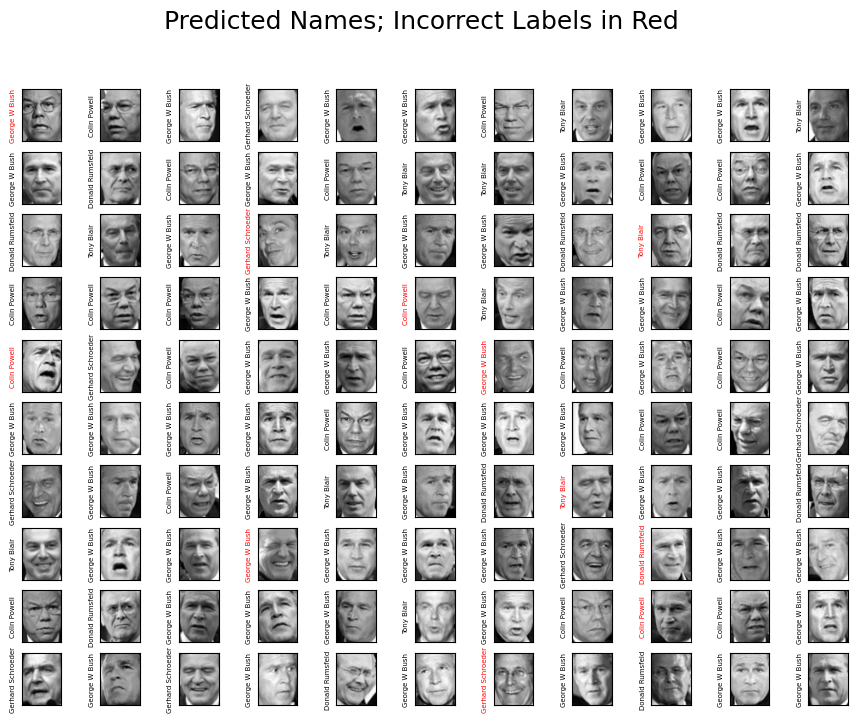

In [33]:
fig, ax = plt.subplots(10, 11)
fig = plt.gcf()
fig.set_size_inches(11, 8)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]],
                   size=5, color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=18);

In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(ytest, yfit)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(ytest, yfit, target_names=faces.target_names))

# Confusion matrix
cm = confusion_matrix(ytest, yfit)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.856140350877193

Classification Report:
                    precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285


Confusion Matrix:
 [[ 55   1   8   0   0]
 [  2  27   2   1   0]
 [  7   4 113   3   0]
 [  3   0   4  20   2]
 [  0   0   2   2  29]]
